In [ ]:
%pip install pandas
%pip install seaborn

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Часть I

[Titanic dataset](https://www.kaggle.com/competitions/titanic/overview) — данные о пассажирах титаника

Загрузим данные

In [3]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Задание 1
Постройте графики распределения возраста в зависимости от совокупности факторов:
- пол
- выжил или нет

c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

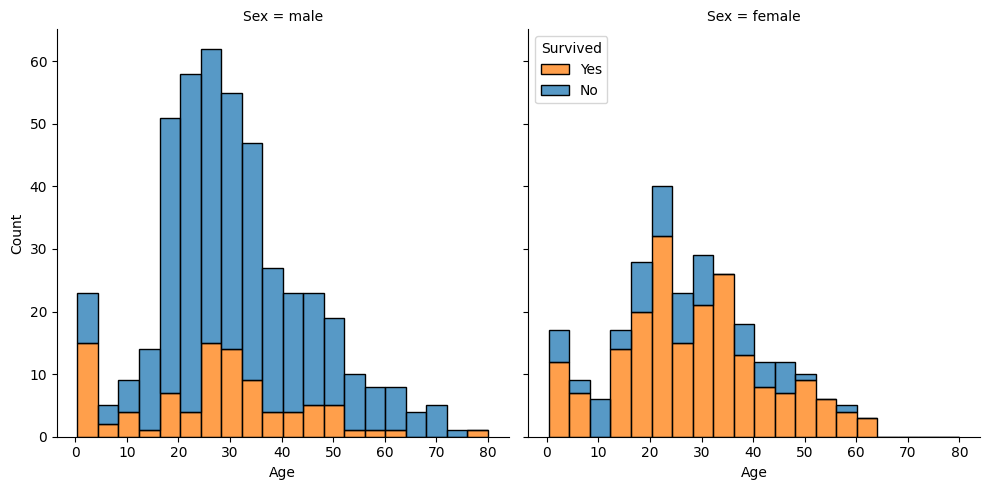

In [57]:
# titanic.head()

g = sns.displot(data=titanic, x='Age', col='Sex', hue='Survived', multiple="stack", legend=False)
plt.legend(title='Survived', loc='upper left', labels=['Yes', 'No'])
plt.show(g)

#### Задание 2
Найдидте самое популярное женское имя

In [102]:
titanic['First name'] = titanic['Name'].str.split(pat=',').str[0]

t = titanic.loc[:, ['Sex', 'First name']][titanic['Sex'] == 'female'].groupby(['First name']).agg({
    'First name': ['count']
})

t['First name'].sort_values(by='count', ascending=False).head(1)

,count
First name,
Andersson,6


#### Задание 3
Сколько на Титанике было детей?

In [109]:
res = titanic[titanic['Age'] <= 18].shape[0]

print(res)

139


#### Задание 4
Найдите и подкрепите агрументами такое правило, что
1) все удовлетворяющие ему пассаижры выжили;
2) все уодвлетворяющие ему пассажиры погибли.

Постарайтесь найти такие правила, чтобы под них попало как можно большее число пассажиров

In [129]:
# Все женщины с возрастом более 60 лет выжили

survived_1 = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >= 60) & (titanic['Survived'] == 1)].shape[0]
dead_1 = titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >= 60) & (titanic['Survived'] == 0)].shape[0]

print("Выжило: ", survived_1, "Погибло: ", dead_1)

# Все мужчины с возрастом от 63 до 79 погибли

survived_2 = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] >= 63) & (titanic['Age'] <= 79) & (titanic['Survived'] == 1)].shape[0]
dead_2 = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] >= 63) & (titanic['Age'] <= 79) & (titanic['Survived'] == 0)].shape[0]

print("Выжило: ", survived_2, "Погибло: ", dead_2)

Выжило:  4 Погибло:  0
Выжило:  0 Погибло:  12


### Часть II

In [133]:
data = pd.read_csv('data/hw2.csv')

data.head(555555)

,x,y,label
0,-10.000000,2.810336,1
1,-9.797980,4.372333,1
2,-9.595960,1.576963,1
3,-9.393939,5.312654,1
4,-9.191919,0.742314,1
...,...,...,...
95,9.191919,-3.088064,0
96,9.393939,4.278246,1
97,9.595960,0.604211,1
98,9.797980,-9.317877,0


#### Задание 5
Вам необхоидмо составить и обосновать правило, которое идеально классифицирует объекты из таблицы `data`.
Класс примера находится в колонке `label`, а признаки — в колонках `x` и `y`

c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\parnishkka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

Text(0.5, 1.0, 'My plot')

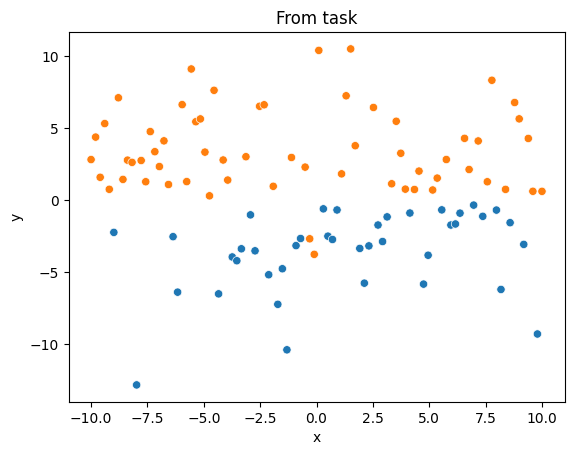

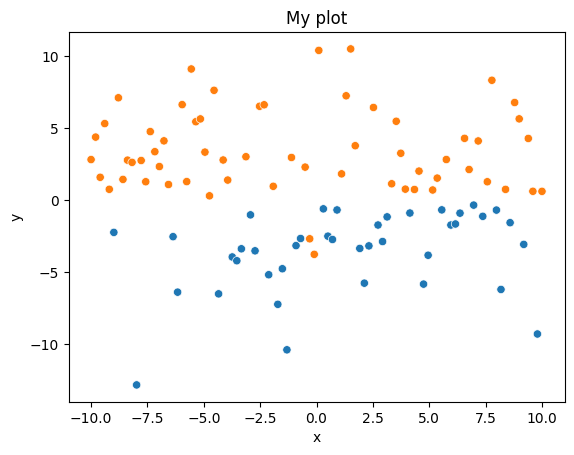

In [146]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

a = sns.scatterplot(data=data, x='x', y='y', hue='label', legend=False, ax=ax1)
a.set_title('From task')

def classification(row):
    if row['y'] >= 0 or (row['x'] >= -0.304 and row['x'] <= 0):
        return 1
    return 0

copy = data
copy['label'] = copy.apply(classification, axis=1)

b = sns.scatterplot(data=copy, x='x', y='y', hue='label', legend=False, ax=ax2)
b.set_title('My plot')